## Лабораторная работа №2

Задание:
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.
2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
    1. мат.ожидание (*)
    2. 2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
    3. квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 
3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

В качестве датасета возьмем данные об оценках, которые ученики получали по математике, вот ссылка: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [7]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv(r'df_lab_2.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Построим график распределения

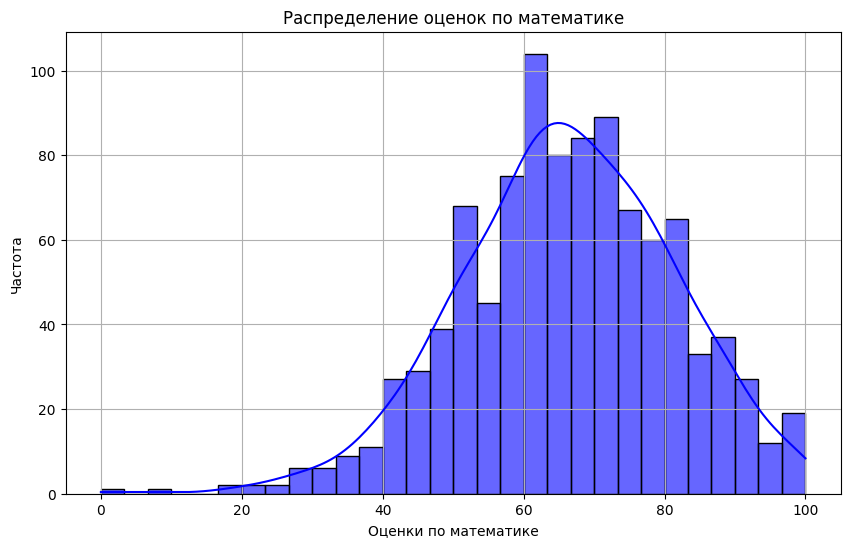

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Распределение оценок по математике')
plt.xlabel('Оценки по математике')
plt.ylabel('Частота')
plt.grid()
plt.show()

Выполним 2 и 3 задания:

In [8]:
math_scores = df['math score']

# Математическое ожидание
mean = np.mean(math_scores)

# Дисперсия
variance = np.var(math_scores, ddof=1)  # Используем ddof=1 для выборочной дисперсии

# Асимметрия
skewness = stats.skew(math_scores)

# Эксцесс
kurtosis = stats.kurtosis(math_scores)

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")


Математическое ожидание: 66.089
Дисперсия: 229.91899799799796
Асимметрия: -0.278516571914075
Эксцесс: 0.26759715461497846


In [9]:
# Квантили уровня 0.05 и 0.95
quantile_05 = np.percentile(math_scores, 5)
quantile_95 = np.percentile(math_scores, 95)

# 2.5%-ная точка
quantile_025 = np.percentile(math_scores, 2.5)

print(f"0.05 квантиль: {quantile_05}")
print(f"0.95 квантиль: {quantile_95}")
print(f"2.5%-ная точка: {quantile_025}")

0.05 квантиль: 40.95
0.95 квантиль: 90.04999999999995
2.5%-ная точка: 35.0


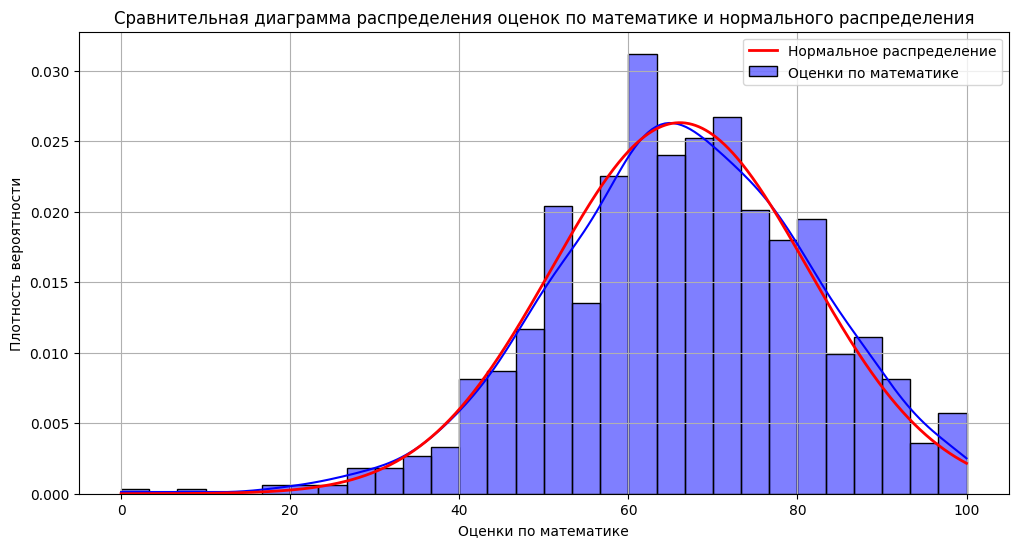

In [10]:
# Создание диапазона значений для нормального распределения
x = np.linspace(min(math_scores), max(math_scores), 1000)
normal_dist = stats.norm.pdf(x, mean, np.sqrt(variance))

plt.figure(figsize=(12, 6))

# Гистограмма оценок по математике
sns.histplot(math_scores, bins=30, kde=True, stat="density", color='blue', alpha=0.5, label='Оценки по математике')

# Нормальное распределение
plt.plot(x, normal_dist, 'r-', label='Нормальное распределение', linewidth=2)

plt.title('Сравнительная диаграмма распределения оценок по математике и нормального распределения')
plt.xlabel('Оценки по математике')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

Сравнение показывает, что оценки по математике и нормальное распределение имеют схожее распределение.

### Проведем анализ для датасета из лабораторной работы №1

In [11]:
df2 = pd.read_csv(r'df_lab_1.csv', encoding='cp1251')

In [ ]:
total_values = df2['total'].dropna()
# Математическое ожидание
mean_total = np.mean(total_values)
# Дисперсия
variance_total = np.var(total_values, ddof=1) 
# Асимметрия
skewness_total = stats.skew(total_values)
# Эксцесс
kurtosis_total = stats.kurtosis(total_values)

print(f"Математическое ожидание (total): {mean_total}")
print(f"Дисперсия (total): {variance_total}")
print(f"Асимметрия (total): {skewness_total}")
print(f"Эксцесс (total): {kurtosis_total}")


Математическое ожидание (total): 19091.409976098115
Дисперсия (total): 23598997415.926468
Асимметрия (total): 34.74079173609242
Эксцесс (total): 1956.8460954598813


In [15]:
# Квантили уровня 0.05 и 0.95
quantile_05_total = np.percentile(total_values, 5)
quantile_95_total = np.percentile(total_values, 95)

# 2.5%-ная точка
quantile_025_total = np.percentile(total_values, 2.5)

print(f"0.05 квантиль (total): {quantile_05_total}")
print(f"0.95 квантиль (total): {quantile_95_total}")
print(f"2.5%-ная точка (total): {quantile_025_total}")

0.05 квантиль (total): 331.0
0.95 квантиль (total): 57938.0
2.5%-ная точка (total): 247.0
